In [32]:
# Import dependencies for exploratory analysis 
import numpy as np
import scipy.stats as st
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline 

In [2]:
# Import and read the loan_approval_dataset.csv.
loan_df = pd.read_csv(Path('Resources/loan_approval_dataset.csv'))
loan_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [15]:
# Check for leading/trailing whitespaces in the column names
loan_df.columns = loan_df.columns.str.strip()

In [16]:
# Check the datatypes of the columns in the DataFrame 
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


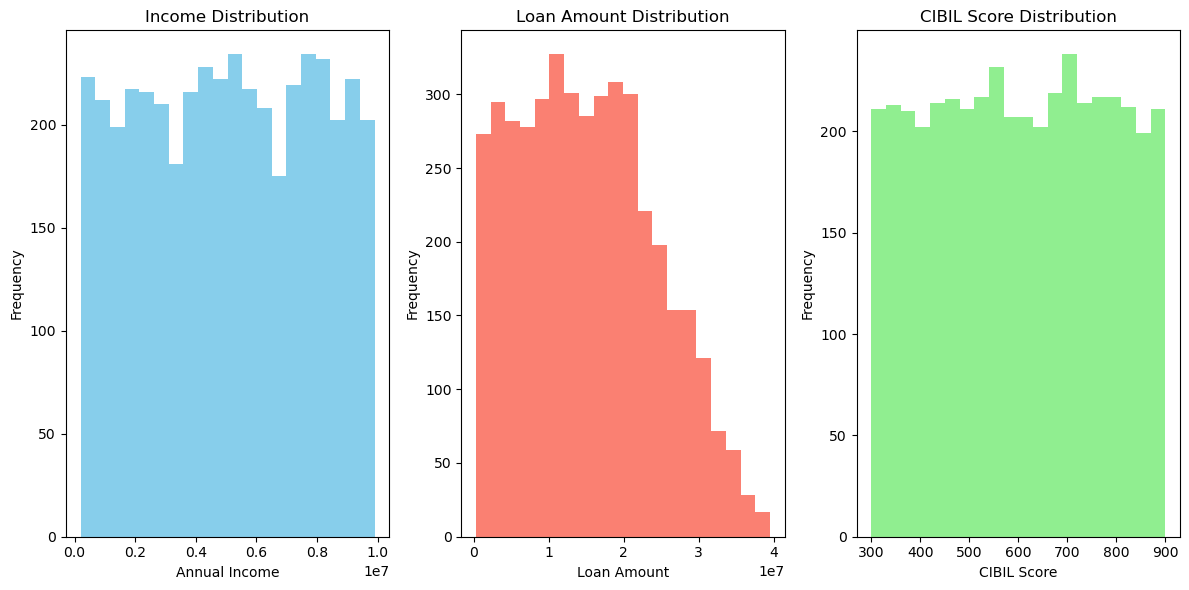

In [14]:
# Create histograms to visualize the distribution of annual income, loan amount, and CIBIL scores
# Histogram for annual income
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.hist(loan_df['income_annum'], bins=20, color='skyblue')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Income Distribution')

# Histogram for loan ammount 
plt.subplot(132)
plt.hist(loan_df['loan_amount'], bins=20, color='salmon')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Loan Amount Distribution')

# Histogram for cibil (credit) score 
plt.subplot(133)
plt.hist(loan_df['cibil_score'], bins=20, color='lightgreen')
plt.xlabel('CIBIL Score')
plt.ylabel('Frequency')
plt.title('CIBIL Score Distribution')

# Save an image of the chart and print it to the screen
plt.savefig("Figures/histograms.png", bbox_inches="tight")
plt.tight_layout()
plt.show()

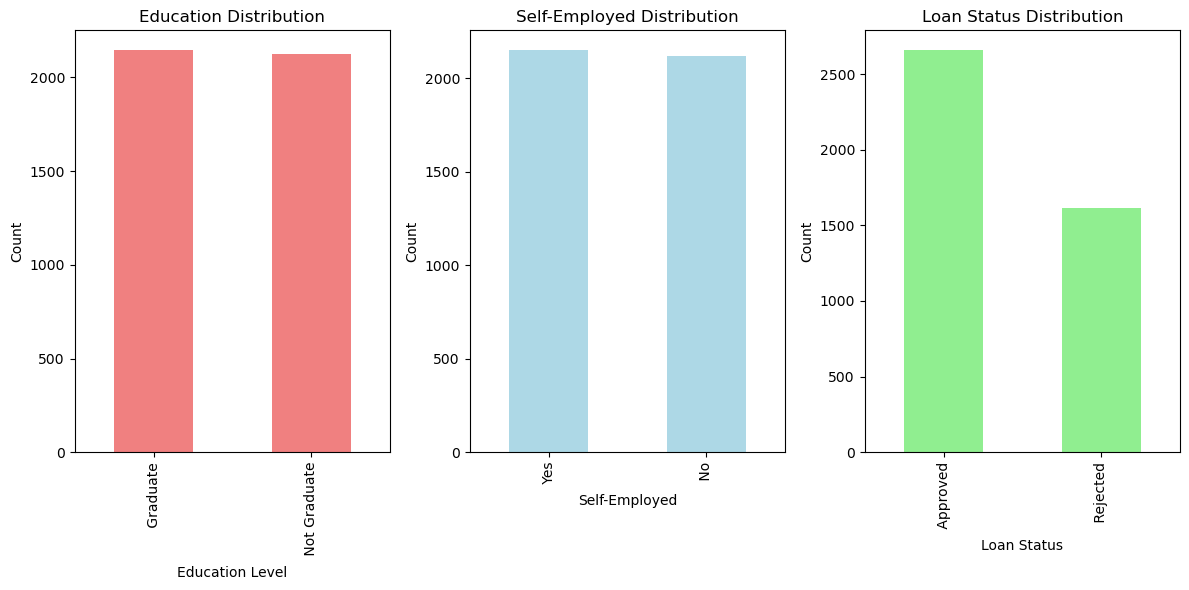

In [15]:
# Create bar charts to visualize counts of education, self-employed, and loan status categories 
# Bar chart of education level
plt.figure(figsize=(12, 6))
plt.subplot(131)
loan_df['education'].value_counts().plot(kind='bar', color='lightcoral')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Distribution')

# Bar chart of self-employed status
plt.subplot(132)
loan_df['self_employed'].value_counts().plot(kind='bar', color='lightblue')
plt.xlabel('Self-Employed')
plt.ylabel('Count')
plt.title('Self-Employed Distribution')

# Bar chart of loan approval/rejection status
plt.subplot(133)
loan_df['loan_status'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status Distribution')

# Save an image of the chart and print it to the screen
plt.savefig("Figures/bar_charts.png", bbox_inches="tight")
plt.tight_layout()
plt.show()

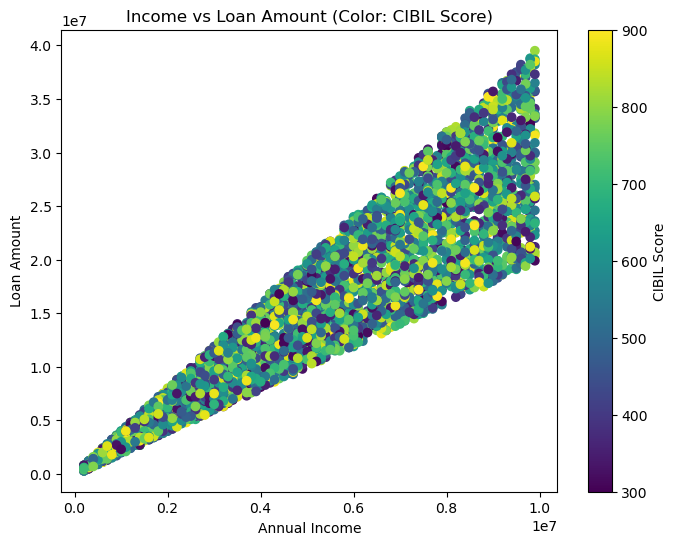

In [17]:
# Create a scatterplot to visualize the correlation between annual income and loan amount
# Use cibil (credit) score for color scheme
plt.figure(figsize=(8, 6))
plt.scatter(loan_df['income_annum'], loan_df['loan_amount'], c=loan_df['cibil_score'], cmap='viridis')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.title('Income vs Loan Amount (Color: CIBIL Score)')
plt.colorbar(label='CIBIL Score')

# Save an image of the chart and print it to the screen
plt.savefig("Figures/income_loan-amnt_scatterplot.png", bbox_inches="tight")
plt.show()

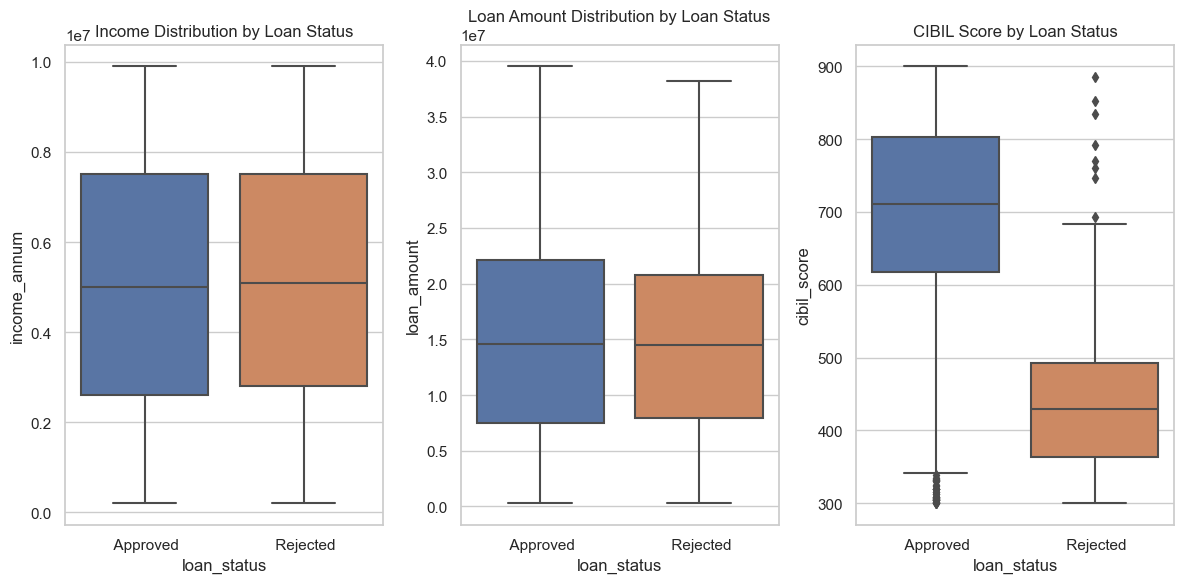

In [22]:
# Create boxplots for distribution of annual income, loan amount, and cibil (credit) score by loan status
# Set the style for the plots
sns.set(style="whitegrid")

# Create a new figure for box plots
plt.figure(figsize=(12, 6))

# Box plot for 'income_annum' by 'loan_status'
plt.subplot(131)
sns.boxplot(x='loan_status', y='income_annum', data=loan_df)
plt.title('Income Distribution by Loan Status')

# Box plot for 'loan_amount' by 'loan_status'
plt.subplot(132)
sns.boxplot(x='loan_status', y='loan_amount', data=loan_df)
plt.title('Loan Amount Distribution by Loan Status')

# Box plot for 'cibil_score' by 'loan_status'
plt.subplot(133)
sns.boxplot(x='loan_status', y='cibil_score', data=loan_df)
plt.title('CIBIL Score by Loan Status')

# Save an image of the chart and print it to the screen
plt.savefig("Figures/loan-status_boxplots.png", bbox_inches="tight")
plt.tight_layout()
plt.show()

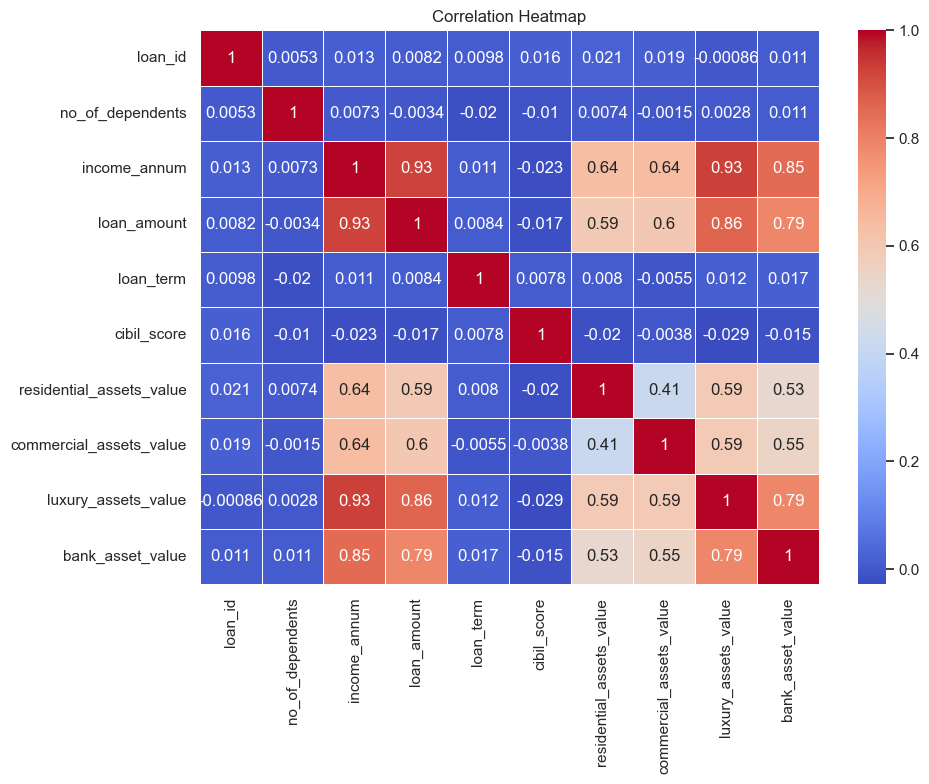

In [23]:
# Create correlation heatmap between numerical variables 
# Calculate the correlation matrix while specifying numeric_only=False
corr_matrix = loan_df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

# Save an image of the chart and print it to the screen
plt.savefig("Figures/correlation_matrix.png", bbox_inches="tight")
plt.tight_layout()
plt.show()

### Run Normality Tests on DataFrame

In [31]:
# Set up column variables for normality test
no_of_dependents = loan_df['no_of_dependents']
annual_income = loan_df['income_annum']
loan_amount = loan_df['loan_amount']
loan_term = loan_df['loan_term']
cibil_score = loan_df['cibil_score']
residential_assets_value = loan_df['residential_assets_value']
commercial_assets_value = loan_df['commercial_assets_value']
luxury_assets_value = loan_df['luxury_assets_value']
bank_asset_value = loan_df['bank_asset_value']

In [33]:
# Perform the Shapiro-Wilk test
statistic, p_value = stats.shapiro(no_of_dependents)

# Set your significance level (alpha)
alpha = 0.05

# Check the p-value against the significance level
if p_value < alpha:
    print("The data does not follow a normal distribution (reject the null hypothesis)")
else:
    print("The data follows a normal distribution (fail to reject the null hypothesis)")

The data does not follow a normal distribution (reject the null hypothesis)


In [34]:
# Run the normality test and if p-value is 0.05 or greater, data has normal distribution
print(st.normaltest(no_of_dependents.sample(100)))

NormaltestResult(statistic=23.171597175307483, pvalue=9.297187827671167e-06)


In [35]:
# Perform the Shapiro-Wilk test
statistic, p_value = stats.shapiro(annual_income)

# Set your significance level (alpha)
alpha = 0.05

# Check the p-value against the significance level
if p_value < alpha:
    print("The data does not follow a normal distribution (reject the null hypothesis)")
else:
    print("The data follows a normal distribution (fail to reject the null hypothesis)")

The data does not follow a normal distribution (reject the null hypothesis)


In [36]:
# Run the normality test and if p-value is 0.05 or greater, data has normal distribution
print(st.normaltest(annual_income.sample(100)))

NormaltestResult(statistic=27.267215278485992, pvalue=1.1994977394528186e-06)


In [37]:
# Perform the Shapiro-Wilk test
statistic, p_value = stats.shapiro(loan_amount)

# Set your significance level (alpha)
alpha = 0.05

# Check the p-value against the significance level
if p_value < alpha:
    print("The data does not follow a normal distribution (reject the null hypothesis)")
else:
    print("The data follows a normal distribution (fail to reject the null hypothesis)")

The data does not follow a normal distribution (reject the null hypothesis)


In [38]:
# Run the normality test and if p-value is 0.05 or greater, data has normal distribution
print(st.normaltest(loan_amount.sample(100)))

NormaltestResult(statistic=4.204746051712997, pvalue=0.12216618050135768)


In [39]:
# Perform the Shapiro-Wilk test
statistic, p_value = stats.shapiro(loan_term)

# Set your significance level (alpha)
alpha = 0.05

# Check the p-value against the significance level
if p_value < alpha:
    print("The data does not follow a normal distribution (reject the null hypothesis)")
else:
    print("The data follows a normal distribution (fail to reject the null hypothesis)")

The data does not follow a normal distribution (reject the null hypothesis)


In [40]:
# Run the normality test and if p-value is 0.05 or greater, data has normal distribution
print(st.normaltest(loan_term.sample(100)))

NormaltestResult(statistic=12.934645109350914, pvalue=0.0015533792580593806)


In [41]:
# Perform the Shapiro-Wilk test
statistic, p_value = stats.shapiro(cibil_score)

# Set your significance level (alpha)
alpha = 0.05

# Check the p-value against the significance level
if p_value < alpha:
    print("The data does not follow a normal distribution (reject the null hypothesis)")
else:
    print("The data follows a normal distribution (fail to reject the null hypothesis)")

The data does not follow a normal distribution (reject the null hypothesis)


In [42]:
# Run the normality test and if p-value is 0.05 or greater, data has normal distribution
print(st.normaltest(cibil_score.sample(100)))

NormaltestResult(statistic=23.99283353889611, pvalue=6.16626797433915e-06)


In [43]:
# Perform the Shapiro-Wilk test
statistic, p_value = stats.shapiro(residential_assets_value)

# Set your significance level (alpha)
alpha = 0.05

# Check the p-value against the significance level
if p_value < alpha:
    print("The data does not follow a normal distribution (reject the null hypothesis)")
else:
    print("The data follows a normal distribution (fail to reject the null hypothesis)")

The data does not follow a normal distribution (reject the null hypothesis)


In [44]:
# Run the normality test and if p-value is 0.05 or greater, data has normal distribution
print(st.normaltest(residential_assets_value.sample(100)))

NormaltestResult(statistic=13.521457124941934, pvalue=0.0011583849106198512)


In [45]:
# Perform the Shapiro-Wilk test
statistic, p_value = stats.shapiro(commercial_assets_value)

# Set your significance level (alpha)
alpha = 0.05

# Check the p-value against the significance level
if p_value < alpha:
    print("The data does not follow a normal distribution (reject the null hypothesis)")
else:
    print("The data follows a normal distribution (fail to reject the null hypothesis)")

The data does not follow a normal distribution (reject the null hypothesis)


In [46]:
# Run the normality test and if p-value is 0.05 or greater, data has normal distribution
print(st.normaltest(commercial_assets_value.sample(100)))

NormaltestResult(statistic=25.50784331374861, pvalue=2.890960792685069e-06)


In [47]:
# Perform the Shapiro-Wilk test
statistic, p_value = stats.shapiro(luxury_assets_value)

# Set your significance level (alpha)
alpha = 0.05

# Check the p-value against the significance level
if p_value < alpha:
    print("The data does not follow a normal distribution (reject the null hypothesis)")
else:
    print("The data follows a normal distribution (fail to reject the null hypothesis)")

The data does not follow a normal distribution (reject the null hypothesis)


In [48]:
# Run the normality test and if p-value is 0.05 or greater, data has normal distribution
print(st.normaltest(luxury_assets_value.sample(100)))

NormaltestResult(statistic=7.209740842954865, pvalue=0.027190967950241104)


In [49]:
# Perform the Shapiro-Wilk test
statistic, p_value = stats.shapiro(bank_asset_value)

# Set your significance level (alpha)
alpha = 0.05

# Check the p-value against the significance level
if p_value < alpha:
    print("The data does not follow a normal distribution (reject the null hypothesis)")
else:
    print("The data follows a normal distribution (fail to reject the null hypothesis)")

The data does not follow a normal distribution (reject the null hypothesis)


In [50]:
# Run the normality test and if p-value is 0.05 or greater, data has normal distribution
print(st.normaltest(bank_asset_value.sample(100)))

NormaltestResult(statistic=4.7841613169362684, pvalue=0.091439232001175)
